In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from __future__ import division
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [43]:
df = pd.read_csv('dataset/creditcard.csv')

In [44]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
features = df.iloc[:,1:29].columns

<function matplotlib.pyplot.show>

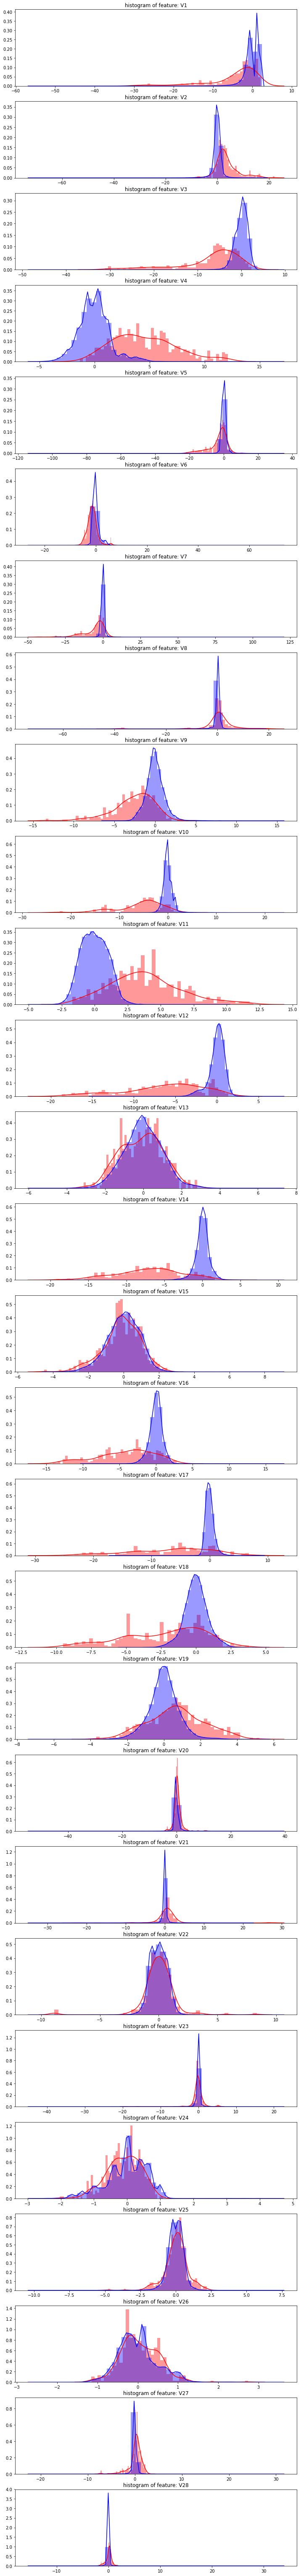

In [46]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50, color='r')
    sns.distplot(df[cn][df.Class == 0], bins=50, color='b')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show

In [179]:
#Drop all of the features that have very similar distributions between the two types of transactions.

df = df.drop(['V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28'], axis =1)

In [180]:
count_normal_transacation = len(df[df["Class"]==0]) # normal transaction are repersented by 0
count_fraud_transacation = len(df[df["Class"]==1]) # fraud by 1
fraud_indices = np.array(df[df.Class==1].index)
normal_indices = np.array(df[df.Class==0].index)

#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data

def undersample(normal_indices, fraud_indices, multiple): # multiple denote the normal data = multiple * fraud data
    normal_indices_undersample = np.array(np.random.choice(normal_indices,(multiple*count_fraud_transacation),replace=False))
    undersample_data = np.concatenate([fraud_indices, normal_indices_undersample])
    undersample_data = df.iloc[undersample_data,:]
    
    print "the normal transacation proportion is :", len(undersample_data[undersample_data.Class==0])/len(undersample_data)
    print "the fraud transacation proportion is :", len(undersample_data[undersample_data.Class==1])/len(undersample_data)
    print "total number of record in resampled data is:",len(undersample_data)
    return(undersample_data)

In [227]:
def prediction_algorithms(model,features_train,features_test,labels_train,labels_test):
    model.fit(features_train,labels_train.values.ravel())
    pred = model.predict(features_test)
    cm = confusion_matrix(labels_test,pred)
    print "the recall for this model is :",cm[1,1] / (cm[1,1] + cm[1,0])
    print "The accuracy is :", (cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print "TP",cm[1,1] # no of fraud transaction which are predicted fraud
    print "TN",cm[0,0] # no. of normal transaction which are predited normal
    print "FP",cm[0,1] # no of normal transaction which are predicted fraud
    print "FN",cm[1,0] # no of fraud Transaction which are predicted normal
    sns.heatmap(cm, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print "Classification Report:" 
    print(classification_report(labels_test,pred))

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9327731092436975
The accuracy is : 0.9552845528455285
TP 111
TN 124
FP 3
FN 8


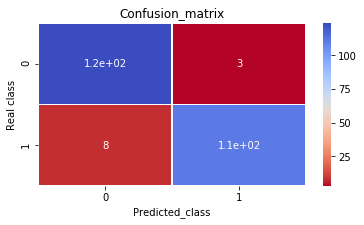

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       127
          1       0.97      0.93      0.95       119

avg / total       0.96      0.96      0.96       246

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.8125
The accuracy is : 0.926829268292683
TP 104
TN 238
FP 3
FN 24


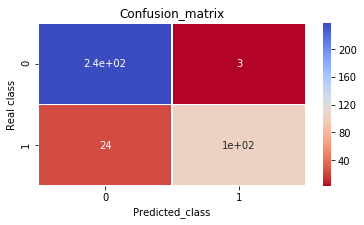

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.99      0.95       241
          1       0.97      0.81      0.89       128

avg / total       0.93      0.93      0.93       369

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.8
The accuracy is : 0.9451219512195121
TP 104
TN 361
FP 1
FN 26


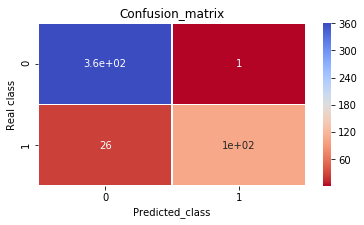

Classification Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       362
          1       0.99      0.80      0.89       130

avg / total       0.95      0.95      0.94       492

________________________________________________________________________________________________________



In [228]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    lr = LogisticRegression()
    prediction_algorithms(lr, X_train, X_test, y_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9416666666666667
The accuracy is : 0.958371955843937
TP 113
TN 68125
FP 2957
FN 7


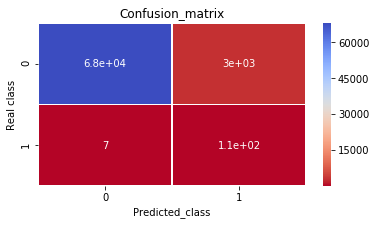

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     71082
          1       0.04      0.94      0.07       120

avg / total       1.00      0.96      0.98     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.8583333333333333
The accuracy is : 0.991081711187888
TP 103
TN 70464
FP 618
FN 17


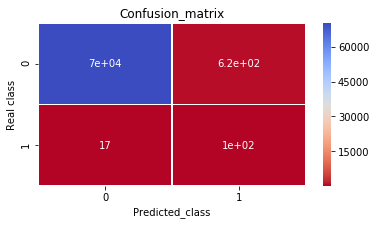

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.14      0.86      0.24       120

avg / total       1.00      0.99      0.99     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.7833333333333333
The accuracy is : 0.9946068930648015
TP 94
TN 70724
FP 358
FN 26


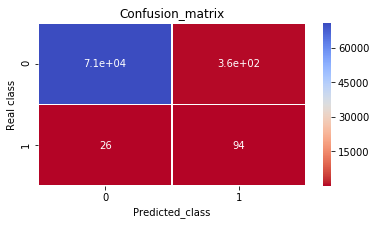

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     71082
          1       0.21      0.78      0.33       120

avg / total       1.00      0.99      1.00     71202

________________________________________________________________________________________________________



In [229]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    lr = LogisticRegression()
    prediction_algorithms(lr, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.14285714285714285
The accuracy is : 0.5813008130081301
TP 17
TN 126
FP 1
FN 102


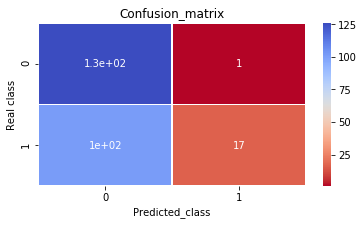

Classification Report:
             precision    recall  f1-score   support

          0       0.55      0.99      0.71       127
          1       0.94      0.14      0.25       119

avg / total       0.74      0.58      0.49       246

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.0625
The accuracy is : 0.6747967479674797
TP 8
TN 241
FP 0
FN 120


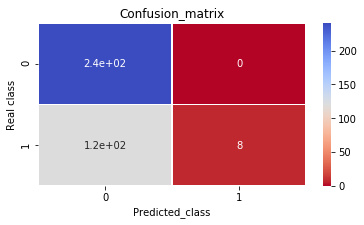

Classification Report:
             precision    recall  f1-score   support

          0       0.67      1.00      0.80       241
          1       1.00      0.06      0.12       128

avg / total       0.78      0.67      0.56       369

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.05384615384615385
The accuracy is : 0.75
TP 7
TN 362
FP 0
FN 123


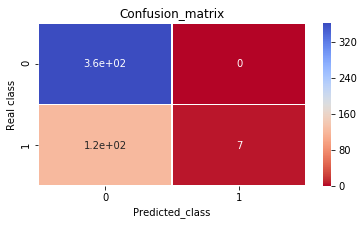

Classification Report:
             precision    recall  f1-score   support

          0       0.75      1.00      0.85       362
          1       1.00      0.05      0.10       130

avg / total       0.81      0.75      0.66       492

________________________________________________________________________________________________________



In [230]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    svm = SVC()
    prediction_algorithms(svm, X_train, X_test, y_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.7583333333333333
The accuracy is : 0.9980197185472318
TP 91
TN 70970
FP 112
FN 29


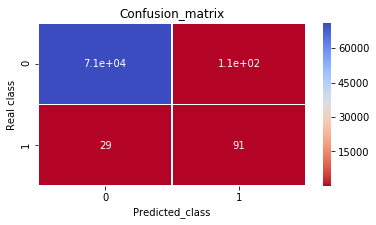

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.45      0.76      0.56       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.7416666666666667
The accuracy is : 0.9995646189713772
TP 89
TN 71082
FP 0
FN 31


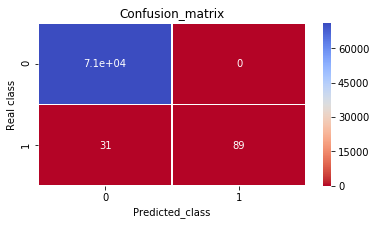

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       1.00      0.74      0.85       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.6833333333333333
The accuracy is : 0.9994663071262043
TP 82
TN 71082
FP 0
FN 38


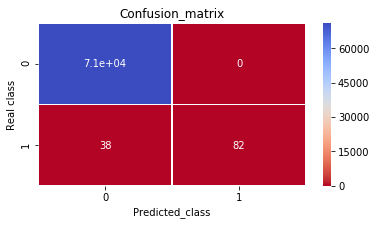

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       1.00      0.68      0.81       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [231]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    svm = SVC()
    prediction_algorithms(svm, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9495798319327731
The accuracy is : 0.9471544715447154
TP 113
TN 120
FP 7
FN 6


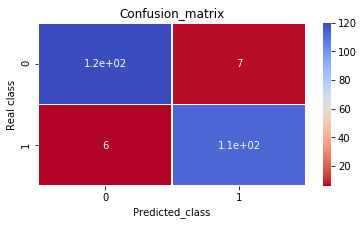

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.94      0.95       127
          1       0.94      0.95      0.95       119

avg / total       0.95      0.95      0.95       246

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.875
The accuracy is : 0.948509485094851
TP 112
TN 238
FP 3
FN 16


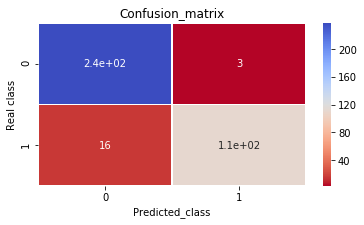

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.96       241
          1       0.97      0.88      0.92       128

avg / total       0.95      0.95      0.95       369

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.8692307692307693
The accuracy is : 0.9634146341463414
TP 113
TN 361
FP 1
FN 17


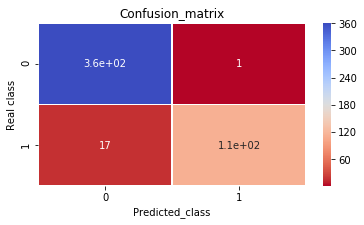

Classification Report:
             precision    recall  f1-score   support

          0       0.96      1.00      0.98       362
          1       0.99      0.87      0.93       130

avg / total       0.96      0.96      0.96       492

________________________________________________________________________________________________________



In [232]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    rf = RandomForestClassifier(n_estimators=100)
    prediction_algorithms(rf, X_train, X_test, y_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9666666666666667
The accuracy is : 0.9597904553242886
TP 116
TN 68223
FP 2859
FN 4


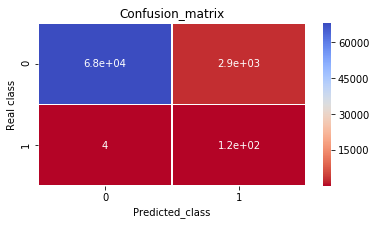

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     71082
          1       0.04      0.97      0.07       120

avg / total       1.00      0.96      0.98     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.9583333333333334
The accuracy is : 0.9871351928316621
TP 115
TN 70171
FP 911
FN 5


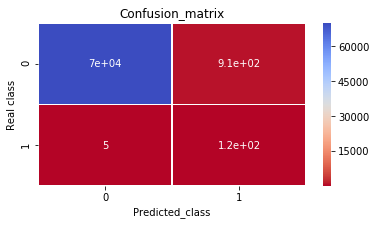

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     71082
          1       0.11      0.96      0.20       120

avg / total       1.00      0.99      0.99     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.9583333333333334
The accuracy is : 0.9965590854189489
TP 115
TN 70842
FP 240
FN 5


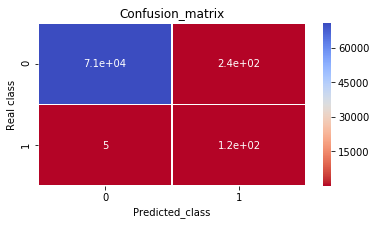

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71082
          1       0.32      0.96      0.48       120

avg / total       1.00      1.00      1.00     71202

________________________________________________________________________________________________________



In [241]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    rf = RandomForestClassifier(n_estimators=100)
    prediction_algorithms(rf, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.9411764705882353
The accuracy is : 0.959349593495935
TP 112
TN 124
FP 3
FN 7


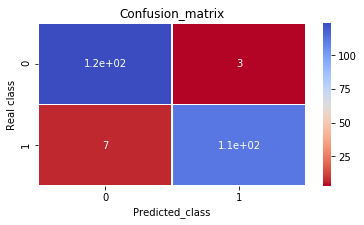

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       127
          1       0.97      0.94      0.96       119

avg / total       0.96      0.96      0.96       246

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.875
The accuracy is : 0.94579945799458
TP 112
TN 237
FP 4
FN 16


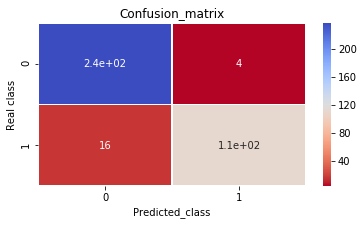

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       241
          1       0.97      0.88      0.92       128

avg / total       0.95      0.95      0.95       369

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.8769230769230769
The accuracy is : 0.959349593495935
TP 114
TN 358
FP 4
FN 16


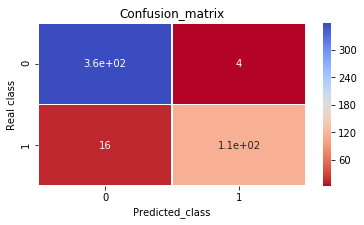

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       362
          1       0.97      0.88      0.92       130

avg / total       0.96      0.96      0.96       492

________________________________________________________________________________________________________



In [234]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    gbt = GradientBoostingClassifier()
    prediction_algorithms(gbt, X_train, X_test, y_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

the undersample data for 1 proportion
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984

the model classification for 1 proportion
the recall for this model is : 0.975
The accuracy is : 0.9609701974663633
TP 117
TN 68306
FP 2776
FN 3


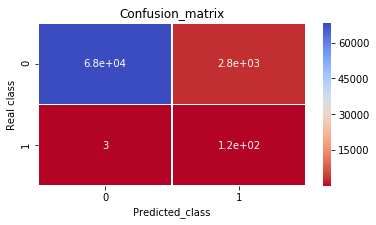

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     71082
          1       0.04      0.97      0.08       120

avg / total       1.00      0.96      0.98     71202

________________________________________________________________________________________________________

the undersample data for 2 proportion
the normal transacation proportion is : 0.666666666667
the fraud transacation proportion is : 0.333333333333
total number of record in resampled data is: 1476

the model classification for 2 proportion
the recall for this model is : 0.95
The accuracy is : 0.9883430240723575
TP 114
TN 70258
FP 824
FN 6


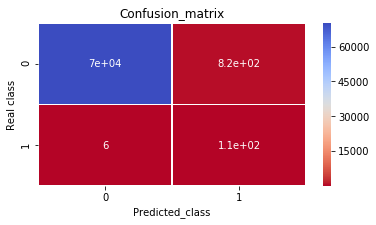

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     71082
          1       0.12      0.95      0.22       120

avg / total       1.00      0.99      0.99     71202

________________________________________________________________________________________________________

the undersample data for 3 proportion
the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968

the model classification for 3 proportion
the recall for this model is : 0.95
The accuracy is : 0.9854217578157917
TP 114
TN 70050
FP 1032
FN 6


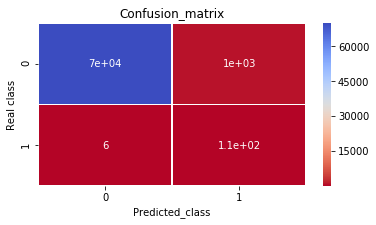

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     71082
          1       0.10      0.95      0.18       120

avg / total       1.00      0.99      0.99     71202

________________________________________________________________________________________________________



In [240]:
for i in range(1,4):
    print "the undersample data for {} proportion".format(i)
    undersample_data = undersample(normal_indices,fraud_indices,i)
    print ""
    print "the model classification for {} proportion".format(i)
    X_undersample = undersample_data.iloc[:, undersample_data.columns != "Class"]
    y_undersample = undersample_data.iloc[:, undersample_data.columns == "Class"]
    X_undersample_train, X_undersample_test, y_undersample_train, y_undersample_test = train_test_split(X_undersample, y_undersample, random_state=0)
    X = df.iloc[:, df.columns != "Class"]
    y = df.iloc[:, df.columns == "Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    gbt = GradientBoostingClassifier()
    prediction_algorithms(gbt, X_undersample_train, X_test, y_undersample_train, y_test)
    print "________________________________________________________________________________________________________"
    print ""

### The result table of prediction algorithms (compared with benchmark model)

*****

|        Model        | BM_Precision | Precision | BM_Recall | Recall | BM_Accuracy | Accuracy | BM_F1 |  F1  | Proportion |
|:-------------------:|:------------:|:---------:|:---------:|:------:|:-----------:|:--------:|:-----:|:----:|:----------:|
| Logistic Regression |     0.06     |    0.04   |    0.89   |  0.94  |     0.98    |   0.96   |  0.12 | 0.07 |     1&1    |
|         SVM         |     0.39     |    0.45   |    0.76   |  0.76  |     0.99    |   0.99   |  0.52 | 0.56 |     1&1    |
|    Random Forest    |     0.05     |    0.06   |    0.97   |  0.975 |     0.97    |   0.975  |  0.09 | 0.11 |     1&1    |
|         GBT         |     0.06     |    0.04   |   0.975   |  0.975 |     0.97    |   0.96   |  0.08 | 0.11 |     1&1    |

*****
As the table shows:
1. The recall rate of Logistic Regression increased significantly after feature engineering.
2. The recall rates of SVM and Random Forest are slightly improved while precision, accuracy and f1 score is also getting better.
3. There is not any improvement for GBT after feature engineering. On the contrary, all the other metrics expect recall rate are decreased after feature engineering.
4. All the best result have the same proportion=1. Which means as the number of normal transaction is increasing the recall for fraud transcation is decreasing.
5. Here models are evaluted and ranked by recall rate because fraud trasactions only take a very little percentage of the whole dataset. However, when the data is tested on the whole dataset, the precision is very less. Which means a lot of "innocent" normal transactions are classified as fraud by mistake. So to improve precision is the main task of model selection.